# Task 2 Regression Exercise - Ander Carrera

This exercise will analyze the dataset of bmw cars. The file contains information of the price, transmission, mileage, fuel
type, road tax, miles per gallon (mpg), and engine size for each BMW car. The variable to be predicted is the price of the cars.

## 1. EDA

Now we are going to analyze each variable and show 5 examples of each:

### These are the entry variables more in depth of the bmw.csv dataset:

Model: The model of the car (Categorical)
 * 5 Series
 * 6 Series
 * 5 Series
 * 1 Series
 * 7 Series

Year: The selling year of the car (Numeric, Discrete)
 * 2014
 * 2018
 * 2016
 * 2017
 * 2014

Transmission: The type of transmission that the car has (Categorical)
 * Automatic
 * Semi-Auto
 * Semi-Auto
 * Manual
 * Semi-Auto

Mileage: The amount of miles that the car has traveled (Numeric, continuous)
 * 67068
 * 14827
 * 62794
 * 26676
 * 39554

FuelType: The type of fuel that the car uses for consumption (Categorical)
 * Diesel
 * Petrol
 * Diesel
 * Diesel
 * Diesel

Tax: the amount of money that the car has to pay as tax (Numeric, continuous)
 * 125
 * 145
 * 160
 * 145
 * 160

Mgp (Miles per gallon) The amount of miles that travels per fuel gallon (Continuous)
 * 57.6
 * 42.8
 * 51.4
 * 72.4
 * 50.4

EngineSize: the size of an engine, usually measured by the amount of cillinders that the engine have (Numeric, Continuous)
 * 2.0
 * 2.0
 * 3.0
 * 1.5
 * 3.0

### This is the output (model) we want to predict of the bmw.csv dataset:

Price: The price of the car (Numeric, continuous)
 * 11200
 * 27000
 * 16000
 * 12750
 * 14500

In [40]:
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side

plt.style.use('bmh')

In [41]:
df = pd.read_csv('./data/bmw.csv')
df.sample(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1456,2 Series,2019,24269,Automatic,123,Diesel,145,49.6,2.0
5819,2 Series,2019,24690,Semi-Auto,7338,Petrol,150,47.9,2.0
525,X5,2013,16498,Automatic,56003,Diesel,300,38.2,3.0
4434,3 Series,2014,12080,Automatic,76587,Diesel,125,57.6,3.0
7062,8 Series,2019,59694,Semi-Auto,2881,Petrol,150,31.7,3.0
2469,2 Series,2017,17858,Automatic,28561,Hybrid,0,135.5,1.5
1959,4 Series,2014,13591,Manual,73417,Diesel,125,57.6,2.0
4303,X5,2019,50480,Automatic,6215,Diesel,145,37.7,3.0
4191,5 Series,2018,23980,Semi-Auto,19203,Diesel,145,65.7,2.0
790,3 Series,2017,19898,Semi-Auto,30824,Hybrid,140,134.5,2.0


**The first question we must answer is: what type of variable is the output variable? By answering this question we will know the type of problem we have. In this case, since price is a numerical variable, we are dealing with a regression problem**.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


With this information we can already deduce that practically all the variables are relevant, since there are no missing values.

In [43]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


Above we can see that the min alue of `tax` and `engineSize` is 0. We must remove this values so it does not alter our model. For that we will do the following:

In [44]:
#Replace 0 with NaN
df["engineSize"] = df["engineSize"].replace(0, np.nan)
df["tax"] = df["tax"].replace(0, np.nan)

df.isna().sum()

model             0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax             340
mpg               0
engineSize       47
dtype: int64

Now we will delete those NaN values:

In [45]:
df.dropna(inplace=True)

df.duplicated().sum()

117

We will remove the duplicate values

In [46]:
df.drop_duplicates(inplace=True)

## Data distribution

Let's see what types of data we have in the dataset, and we will plot those which are numeric

In [47]:
list(set(df.dtypes.tolist()))


[dtype('int64'), dtype('O'), dtype('float64')]

In [48]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125.0,57.6,2.0
1,2018,27000,14827,145.0,42.8,2.0
2,2016,16000,62794,160.0,51.4,3.0
3,2017,12750,26676,145.0,72.4,1.5
4,2014,14500,39554,160.0,50.4,3.0


Let's plot them

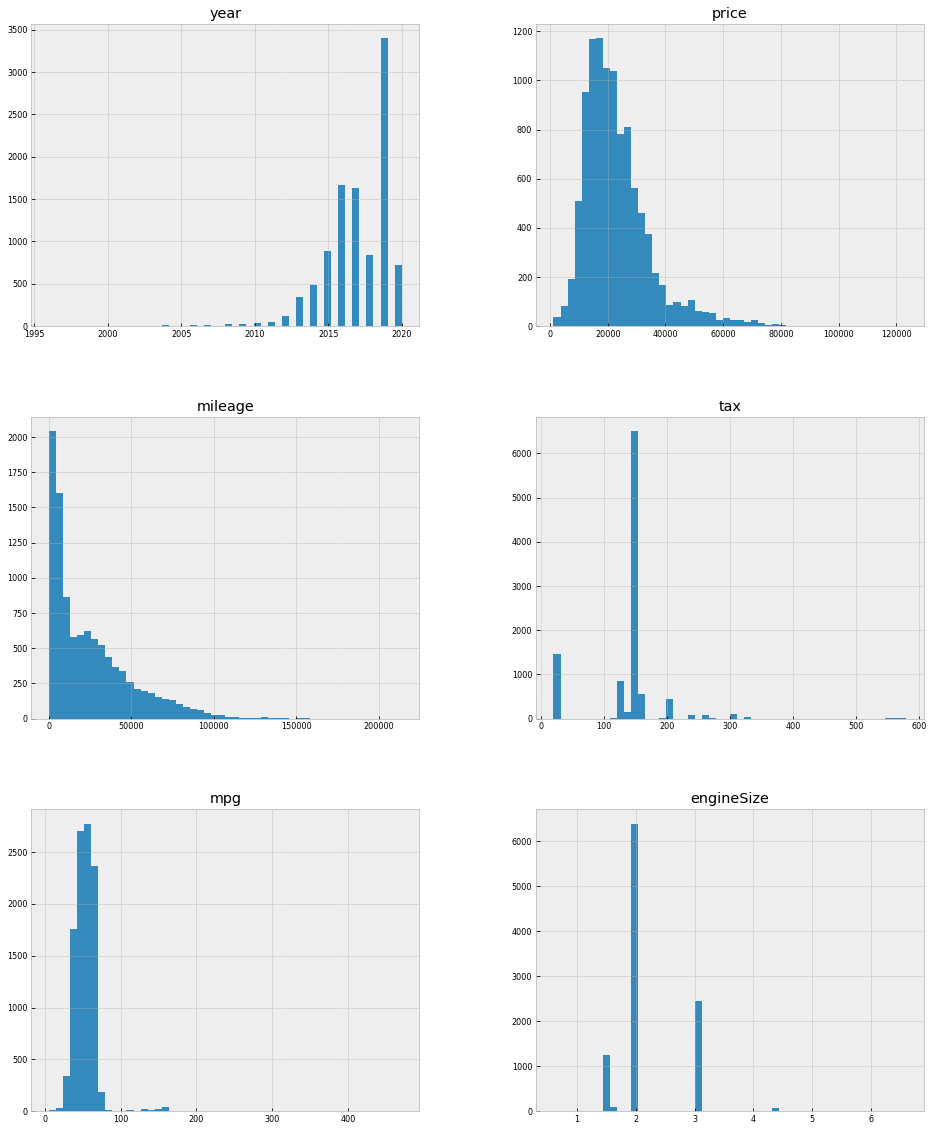

In [49]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8,
            ylabelsize=8);  # ; avoid having the matplotlib verbose informations

These are some initial conclusions:
* Year: data is skewed to the left. There is a clear difference in 2019, which is the year where the most cars were sold
* Price: Data skewed to the right. We will analyze this more in depth in the following cells as it is the output variable.
* Mileage: Data skewed to the left. A large part of the cars have a mileage from 0 to 10000. It makes sense, since as we have seen recently in the Year variable, the vast majority of cars have been sold in 2019.
* Tax: Data skewed to the center-right. The value around 140 clearly stands out, since most of the data is concentrated there.
* MPG: Data skewed to the right. The distribution is not very wide, since practically all values are concentrated between approximately 30 and 80. We can appreciate an input error around 450 mpg, as it is almost impossible that a car can reach those consumption levels
* Engine size: Data skewed to the center-right. We can clearly see that most of the cars have a 2.0 engine.

Some general conclusions we can draw are that many cars that have been sold are fairly new (2019). Consequently, the mileage is also quite low in general. In addition, we can deduce that most cars are mid-range as most data are between 10000 and 40000 euros. Also almost all cars pay a tax of 140. Finally, we can deduce that they all have a similar consumption around 30 and 80 and that most cars have a 3-cylinder engine.

Let's remove the input error above 400 in mpg and plot them again

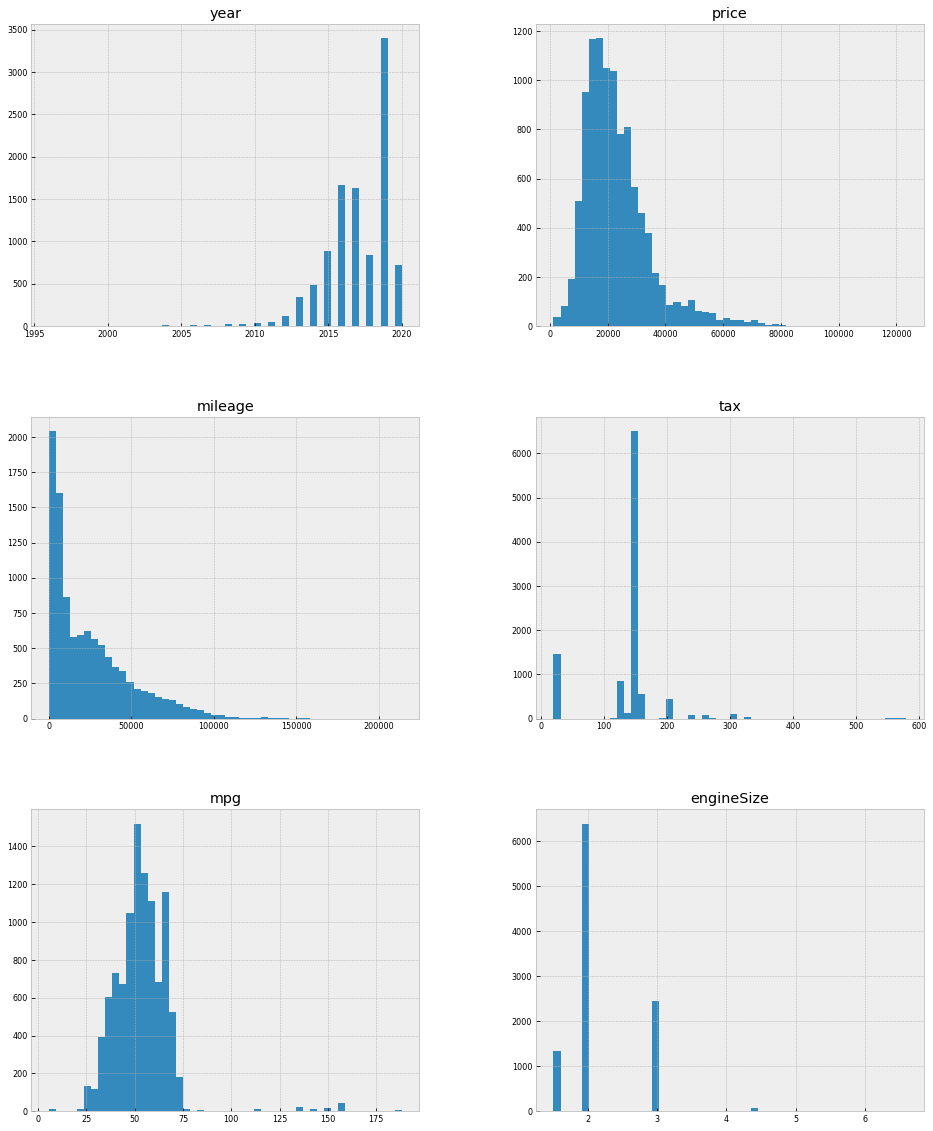

In [50]:
indexNames = df_num[df_num['mpg'] > 400].index
# Delete these row indexes from dataFrame
df_num.drop(indexNames, inplace=True)

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8,
            ylabelsize=8);  # ; avoid having the matplotlib verbose informations

Let's look at the price distribution of the cars:

count     10300.000000
mean      22974.216602
std       11462.846794
min        1200.000000
25%       14999.000000
50%       20750.000000
75%       27990.000000
max      123456.000000
Name: price, dtype: float64


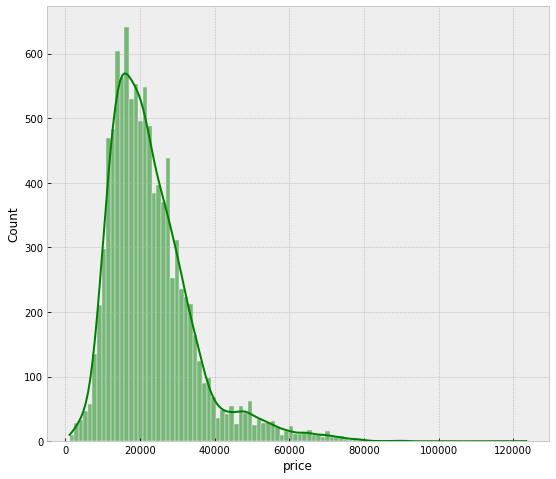

In [51]:
def plot_distribution(target_df, column):
    print(target_df[column].describe())
    plt.figure(figsize=(9, 8))
    sns.histplot(target_df[column], color='g', bins=100, kde=True)


plot_distribution(df_num, 'price')

In this graph we can see that the data are skewed to the right, let's look at the possible outliers

In [52]:
def boxplot(target_df, column):
    sns.boxplot(data=target_df[column])

    median = np.median(target_df[column])
    Q3 = np.percentile(target_df[column], 75)
    Q1 = np.percentile(target_df[column], 25)

    print("Q1:", Q1)
    print("Q3:", Q3)

    iqr = Q3 - Q1
    print("Median:", median)
    print("IQR:", iqr)

    upper_whisker = target_df[column][target_df[column] <= Q3 + 1.5 * iqr].max()
    print("Outliers starting from:", upper_whisker)

Q1: 14999.0
Q3: 27990.0
Median: 20750.0
IQR: 12991.0
Outliers starting from: 47440


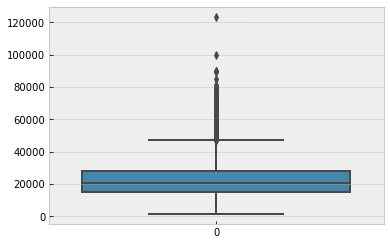

In [53]:
boxplot(df_num, 'price')

According to this graph, we can see that there are outliers starting from 47440. Most of the outliers are agglutinated, but there are 2 variables that stand out from the rest, which are the ones starting from 100k and above, so these ones might be interesting to delete:

In [54]:
def remove_values_greater_than(target_df, column, min):
    indexNames = target_df[target_df[column] > min].index
    # Delete these row indexes from dataFrame
    target_df.drop(indexNames, inplace=True)

count    10298.000000
mean     22956.984366
std      11395.881161
min       1200.000000
25%      14999.000000
50%      20750.000000
75%      27990.000000
max      89990.000000
Name: price, dtype: float64


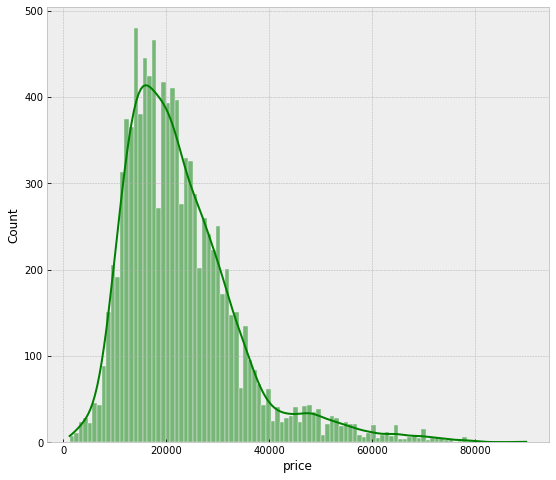

In [55]:
remove_values_greater_than(df_num, 'price', 99000)
plot_distribution(df_num, 'price')

In [ ]:
### Correlations

In [56]:
df_num_corr = df_num.corr()['price']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Price:\n{}".format(len(golden_features_list),
                                                                       golden_features_list))

There are 3 strongly correlated values with Price:
price      1.000000
year       0.629364
mileage   -0.608207
Name: price, dtype: float64


We have found 2 variables that correlate strongly with price. With Year it has a direct correlation and with Millage it has an inverse correlation. Obviously, when correlating all variables, the correlation with price will always be 1 because it is the same variable.

The correlation factor alone does not always explain the relationship between variables, but plotting them can help to discover trends.

For example, a curvilinear relationship could not be discovered by looking at the correlation factor alone.

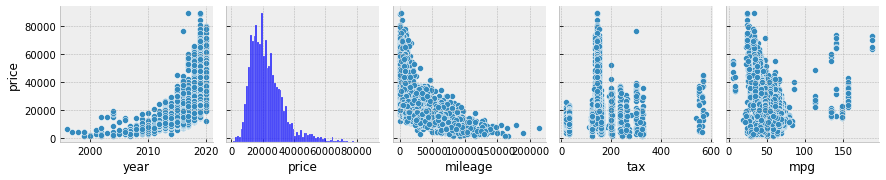

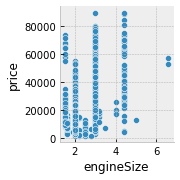

In [57]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i + 5],
                 y_vars=['price'])

With year price has a direct correlation and with Millage price has an inverse correlation.

With this we can conclude that the newer the car, the higher the price, and the more mileage a car has, the lower the price.

Let's look at the multivariate correlation. In this case, instead of plotting all pairs of variables, we will plot everything on a single graph, as it may be easier to interpret.

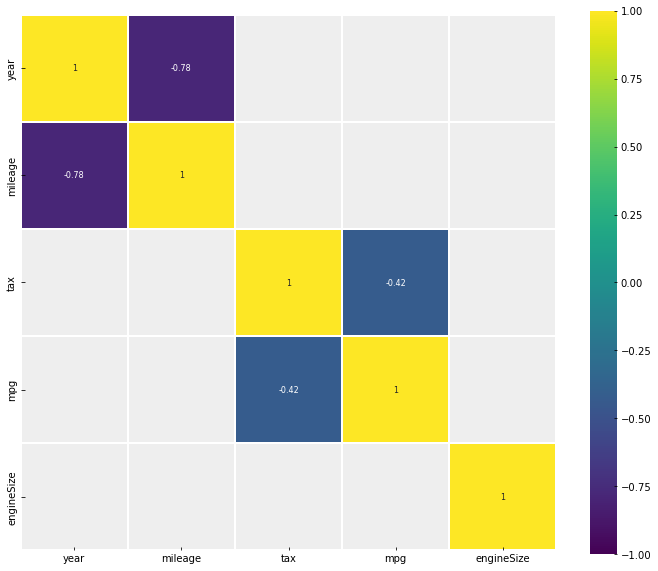

In [58]:
corr = df_num.drop('price', axis=1).corr()  # We already examined price correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Through this graph we can observe two **reversed correlations**:
* mileage-year: The more mileage a car has, the lower its selling year value will be. For example, a car that has been sold in 2010, will have a higher mileage, compared to a car that has been sold in 2020, which will have a higher mileage. Do not confuse the value of the year with how long ago it was sold.
* Tax-Mpg: The more a car consumes, the less taxes will have to be paid.

We can also conclude that there is an irrelevant feature, which is the size of the engine. In principle, one might think that the larger the engine, the higher the fuel consumption, but the graph above shows that there is no correlation between these two variables.

## 2. Prepare the data for training

We will transform our categorical variables into numerical data, so our model can understand the data. For that, we will transform them using one-hot encoding, as we have specified number of repetied values in each column, and we don't want to give any sort of order.

In [59]:
df_num = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'])
df_num.head()

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125.0,57.6,2.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2018,27000,14827,145.0,42.8,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2016,16000,62794,160.0,51.4,3.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,2017,12750,26676,145.0,72.4,1.5,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,14500,39554,160.0,50.4,3.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


**Should you scale the data?**

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

In this case, as the variable to predict is the price, and therefore, the distance between the price points is relevant, we should consider standardization.

The most common techniques of feature scaling are Normalization and Standardization.


**Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. It is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1].

**Standardization** can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


**Why do we need scaling?**

Machine learning algorithems just see numbers — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training/testing the model.

After seeing the theory behind normalization vs standarization, we will not proceed with none of these methods and will keep going. After seeing the results if we are not good enough, we will consider if we do need one of these methods.

## 3. Training and model evaluation

We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [60]:
from sklearn.model_selection import train_test_split

X = df_num.drop('price', axis=1).values
y = df_num.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

number_observations = df_num.shape[0]
number_features = df_num.shape[1] - 1  # -1 so we remove the output variable


Next up, we will train three different models and evaluate each one with the following metrics: Median related: MAE, RMSE. R2 Related: R2 and Adjusted R2.
- **mean absolute error (MAE)** is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. It has the same unit as the original data, and it can only be compared between models whose errors are measured in the same units.
- In statistical modeling and particularly regression analyses, a common way of measuring the quality of the fit of the model is the **RMSE (also called Root Mean Square Deviation)**. If the predicted responses are very close to the true responses the RMSE will be small. If the predicted and true responses differ substantially — at least for some observations — the RMSE will be large. A value of zero would indicate a perfect fit to the data.
- **R Square** is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. It may fit very well to the training data but performs badly for testing data. That is why **Adjusted R Square** is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

And we will also plot the results of the actual data vs predicted data.

In [61]:
def evaluate_model(y_pred, y_test, r2_score):
    MAE=metrics.mean_absolute_error(y_test, y_pred)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    error_interval = 100 - (MAE/RMSE*100)
    print('Mean Absolute Error:', MAE, '%')
    print('Root Mean Squared Error:', RMSE, '%')
    print('Error interval:', error_interval, '%')

    adj_r2 = 1 - (1 - r2_score) * (number_observations - 1) / (number_observations - number_features - 1)
    print('R2 score:', r2_score * 100, '%')
    print('Adj R2 score:', adj_r2 * 100, '%')

In [62]:
def plot_results(y_test_label, y_pred):
    x_ax = range(len(y_test_label))
    plt.plot(x_ax, y_test_label, linewidth=1, label="original")
    plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
    plt.title("y-test and y-predicted data")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

### 3.1. Linear Regression

Linear regression performs the task to predict a dependent variable(target) based on the given independent variable(s). So, this regression technique finds out a linear relationship between a dependent variable and the other given independent variables.

Pros:
- Linear Regression is simple to implement.
- Less complexity compared to other algorithms.
- Linear Regression may lead to over-fitting but it can be avoided using some dimensionality reduction techniques, regularization techniques, and cross-validation.

Cons:
- Outliers affect this algorithm badly.
- It over-simplifies real-world problems by assuming a linear relationship among the variables, hence not recommended for practical use-cases.

Mean Absolute Error: 2821.1023949943574 %
Root Mean Squared Error: 4169.197634593233 %
Error interval: 32.33464464273116 %
R2 score: 87.39414417948161 %
Adj R2 score: 87.34993465103167 %


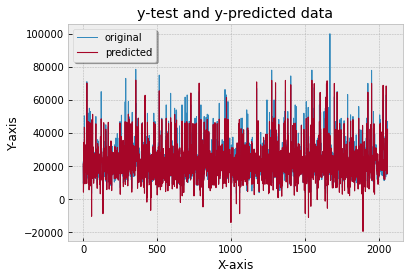

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test, regressor.score(X_test, y_test))
plot_results(y_test, y_pred)

We can see above that the score is good but not excellent. In addition, we see that the difference between the MAE and the RMSE is quite large, this means that the outliers affect a lot.

### 3.2. Decision Tree
 Decision trees are good at capturing non-linear interaction between the features and the target variable. Decision trees somewhat match human-level thinking so it’s very intuitive to understand the data.

Pros:
- Easy to understand and interpret, visually intuitive.
- It can work with numerical and categorical features.
- Requires little data preprocessing: no need for one-hot encoding, dummy variables, etc.

Cons:
- It tends to overfit.
- A small change in the data tends to cause a big difference in the tree structure, which causes instability.

Mean Absolute Error: 2042.146288209607 %
Root Mean Squared Error: 3262.38597813801 %
Error interval: 37.40329004923104 %
R2 score: 92.2814085539706 %
Adj R2 score: 92.25433896877264 %


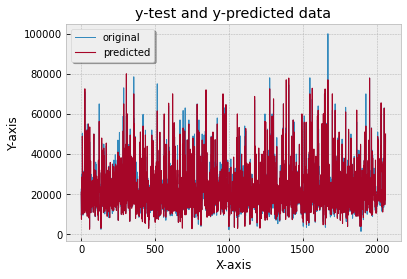

In [64]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test, regressor.score(X_test, y_test))
plot_results(y_test, y_pred)

We can see above that the score has improved somewhat. But we still see that the difference between MAE and RMSE is still high, this means that the outliers are still affecting quite a lot.

### 3.3. Random Forest
Random Forests are an ensemble(combination) of decision trees. It is a Supervised Learning algorithm used for classification and regression. The input data is passed through multiple decision trees. It executes by constructing a different number of decision trees at training time and outputting the class that is the mode of the classes (for classification) or mean prediction (for regression) of the individual trees.

Pros:
- Good at learning complex and non-linear relationships
- Very easy to interpret and understand

Cons:
- They are prone to overfitting
- Using larger random forest ensembles to achieve higher performance slows down their speed and then they also need more memory.


With this technique, we are going to do some **parameter tuning** as well, which is going to consist on determining the sweet spot of the level of the trees.

Mean Absolute Error: 3724.0880149036902 %
Root Mean Squared Error: 5289.822209325296 %
Error interval: 29.59899468192735 %
R2 score: 79.70684738459852 %
Adj R2 score: 79.63567802325858 %


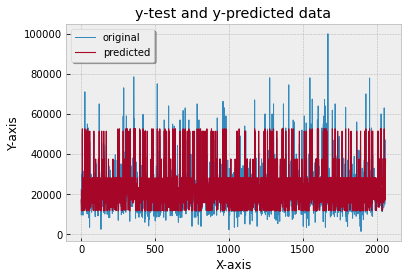

In [65]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(bootstrap=True, max_depth=3)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test, regressor.score(X_test, y_test))
plot_results(y_test, y_pred)

Above you can clearly see how the trees do not reach the full depth of the data. And this affects very badly the scoring and the errors of the means.

Mean Absolute Error: 1589.0109056572167 %
Root Mean Squared Error: 2522.6798580717987 %
Error interval: 37.010996438058875 %
R2 score: 95.38478806012664 %
Adj R2 score: 95.36860222185723 %


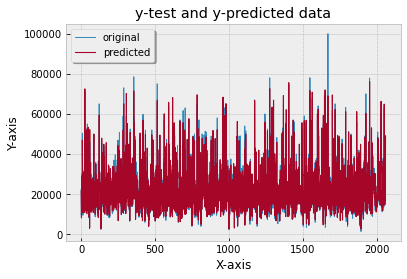

In [66]:
regressor = RandomForestRegressor(bootstrap=True, max_depth=300)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test, regressor.score(X_test, y_test))
plot_results(y_test, y_pred)

Now we see that above the data reaches the full depth of the data. But the maximum depth of 300 is too much, let's try to find the sweet spot...

Mean Absolute Error: 1584.4884752002945 %
Root Mean Squared Error: 2498.4493893304393 %
Error interval: 36.58112579879306 %
R2 score: 95.47302096678713 %
Adj R2 score: 95.4571445668655 %


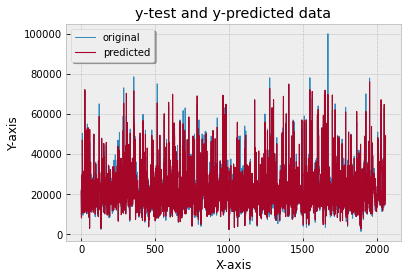

In [67]:
regressor = RandomForestRegressor(bootstrap=True, max_depth=30)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test, regressor.score(X_test, y_test))
plot_results(y_test, y_pred)

Above we see that the trees finally reach the full depth of the data, although there is a point around 1700 that does not calculate it well. Considering that the differences in the means are still significant, we can deduce that it is because of the outliers. Let us now proceed to completely eliminate the outliers that we did not eliminate at the beginning.

count     9829.000000
mean     21301.511954
std       8524.197299
min       1200.000000
25%      14940.000000
50%      19995.000000
75%      26922.000000
max      47440.000000
Name: price, dtype: float64


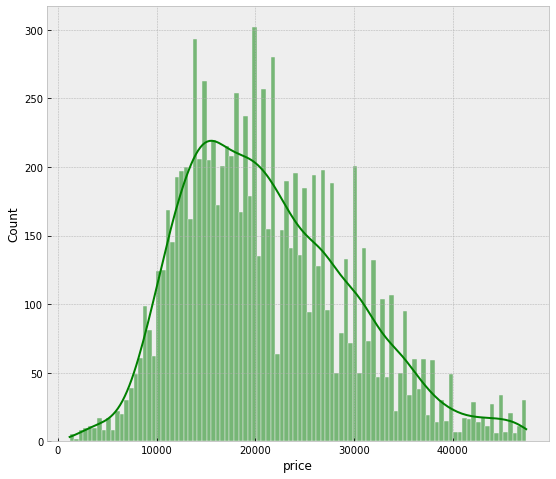

In [68]:
remove_values_greater_than(df_num, 'price', 47440)
plot_distribution(df_num, 'price')

Mean Absolute Error: 1433.8296368078768 %
Root Mean Squared Error: 2032.6464124473955 %
Error interval: 29.459957815216725 %
R2 score: 94.37592485150141 %
Adj R2 score: 94.35620086656755 %


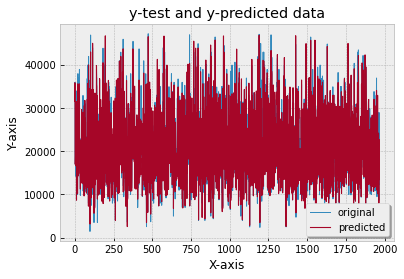

In [69]:
X = df_num.drop('price', axis=1).values
y = df_num.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(bootstrap=True, max_depth=30)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test, regressor.score(X_test, y_test))
plot_results(y_test, y_pred)

Above we see that the trees finally reach the full depth of the data, and that there are not as many outliers as before. We also see that the score is quite good around 94% and that the difference between these two values does not differ too much, that means that our model has no overfitting.

**We are clearly in front of the best model so far**

We can see that even the differences between the errors of the means are significant, let's see if normalizing the data gives better results

### Standardization

In [70]:
df_norm=((df_num-df_num.min())/(df_num.max()-df_num.min()))
df_norm.describe()

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
count,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,...,9829.000000,9829.000000,0.0,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000
mean,0.875178,0.434721,0.121936,0.206134,0.104931,0.353039,0.182419,0.118120,0.237054,0.100112,...,0.010784,0.000203,NaN,0.329332,0.235731,0.434937,0.661207,0.014752,0.001526,0.322515
std,0.099272,0.184347,0.117691,0.105100,0.032752,0.113115,0.386209,0.322766,0.425297,0.300164,...,0.103292,0.014264,NaN,0.469994,0.424476,0.495774,0.473324,0.120566,0.039037,0.467463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.833333,0.297145,0.028019,0.223214,0.089405,0.318182,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.875000,0.406466,0.090552,0.223214,0.102729,0.318182,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.958333,0.556272,0.181482,0.232143,0.123146,0.318182,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
df_norm.isna().sum()

year                         0
price                        0
mileage                      0
tax                          0
mpg                          0
engineSize                   0
model_ 1 Series              0
model_ 2 Series              0
model_ 3 Series              0
model_ 4 Series              0
model_ 5 Series              0
model_ 6 Series              0
model_ 7 Series              0
model_ 8 Series           9829
model_ M2                    0
model_ M3                    0
model_ M4                    0
model_ M5                    0
model_ M6                    0
model_ X1                    0
model_ X2                    0
model_ X3                    0
model_ X4                    0
model_ X5                    0
model_ X6                    0
model_ X7                 9829
model_ Z3                    0
model_ Z4                    0
model_ i3                    0
model_ i8                 9829
transmission_Automatic       0
transmission_Manual          0
transmis

We see that we have some columns with all invalid values, let's remove them and train the model with the best algorithm obtained previously.

In [72]:
df_norm=df_norm.drop(columns=['model_ 8 Series', 'model_ X7', 'model_ i8'])

Mean Absolute Error: 0.03095745065351304 %
Root Mean Squared Error: 0.04366334491248496 %
Error interval: 29.099681401959742 %
R2 score: 94.4512252469048 %
Adj R2 score: 94.43176534518912 %


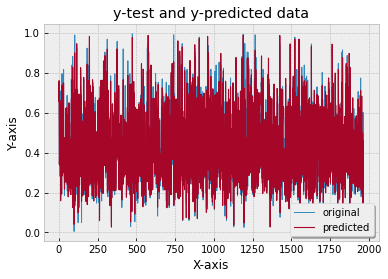

In [73]:
X = df_norm.drop('price', axis=1).values
y = df_norm.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(bootstrap=True, max_depth=300)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_pred, y_test, regressor.score(X_test, y_test))
plot_results(y_test, y_pred)

### Conclusion

We see that standardizing the data we can get slightly better results but they are not very significant. With this we conclude that **the best model is the previous random forest model with a maximum depth of 30 with the dataset without outliers, this is, without the values starting from 47440**

### Important features

The following Python code creates a list of tuples where each tuple is a pair, (feature name, importance). The code here takes advantage of some neat tricks in the Python language, namely list comprehensive, zip, sorting, and argument unpacking.

In [74]:
features = df_num.drop('price', axis=1)
feature_list = list(features.columns)

# Get numerical feature importances
importances = list(regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
[]

Variable: year                 Importance: 0.55
Variable: engineSize           Importance: 0.19
Variable: mileage              Importance: 0.07
Variable: mpg                  Importance: 0.07
Variable: tax                  Importance: 0.02
Variable: model_ i3            Importance: 0.02
Variable: model_ 1 Series      Importance: 0.01
Variable: model_ 2 Series      Importance: 0.01
Variable: model_ 5 Series      Importance: 0.01
Variable: model_ X2            Importance: 0.01
Variable: model_ X4            Importance: 0.01
Variable: model_ 3 Series      Importance: 0.0
Variable: model_ 4 Series      Importance: 0.0
Variable: model_ 6 Series      Importance: 0.0
Variable: model_ 7 Series      Importance: 0.0
Variable: model_ 8 Series      Importance: 0.0
Variable: model_ M2            Importance: 0.0
Variable: model_ M3            Importance: 0.0
Variable: model_ M4            Importance: 0.0
Variable: model_ M5            Importance: 0.0
Variable: model_ M6            Importance: 0.0
Va

[]

These stats definitely prove that some variables are much more important to our problem than others, such as `year` and `engineSize`.